In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [7]:
mnist = tf.keras.datasets.mnist
(x_treino, y_treino),(x_teste, y_teste) = mnist.load_data()

## Dataset
[MNIST](http://yann.lecun.com/exdb/mnist/) é um dataset com 60000 imagens de dígitos escritos a mão:
![Dataset](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Cada uma das imagem é rotulada e possui 28x28 pixels:

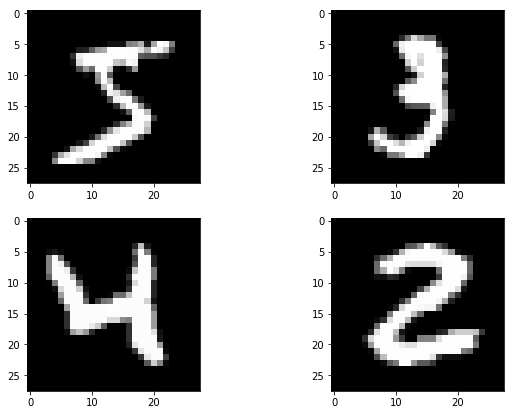

In [3]:
plt.figure(figsize=(10, 7)) 
plt.subplot(221)
plt.imshow(x_treino[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_treino[10], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_treino[20], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_treino[25], cmap=plt.get_cmap('gray'))
plt.show()

Os possíveis valores por padrão são de 0 a 255 para cada pixel da imagem. Normalizando a base para de 0 a 1 é possível obter melhores resultados:

In [4]:
x_treino = x_treino/255.0
x_teste = x_teste/255.0

print(f'Número de imagens: {x_treino.shape[0]}\n'
        f'Linhas por imagem: {x_treino.shape[1]}\n'
        f'Colunas por imagem: {x_treino.shape[2]}')

Número de imagens: 60000
Linhas por imagem: 28
Colunas por imagem: 28


O modelo contruído é composto pelas seguintes camadas:
- LSTM: Camada capaz de processar sequências de dados e não apenas uma entrada comum
    - 128 é o número de células que serão utilizadas
    - input_shape dita o formato de entrada para estas células, no caso se trata de uma entrada de 28x28
    - activation é a função de ativação utilizada pela célula, relu retorna um max entre x e 0
    - return_sequences faz com que a camada tenha como saída uma sequência e não uma saída simples
    - dropout é uma medida contra overfitting e desliga algumas conexões aleatoriamente
- LSTM: Uma segunda camada similar a primeira mas desta vez com um menor dropout e uma saída simples
- Dense: É a implementação simples de um nó em uma rede neural, sua saída é funcao_ativacao(prod_escalar(entrada, pesos) + bias)
- Dense: Outra camada densa mas desta vez com a função de ativação softmax, responsável por gerar uma distribuição probabilística como saída, o número de células desta vez é 10 (referente aos possíveis dígitos 0-9)

In [8]:
warnings.filterwarnings('ignore')

model = Sequential()
model.add(LSTM(128, input_shape=(x_treino.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

A função de otimização a ser usada será a Adam, uma função de otimização baseada em gradientes de primeira ordem, os parâmetros recebidos por ela são o learning_rate e o decay. O primeiro define a taxa de aprendizado e o segundo define o quanto essa taxa cai durante a execução do algoritmo.

Ao compilar o modelo definimos a função de loss para SCC que terá como saída inteiros baseados nas probabilidades recebidas pela última camada.

In [6]:
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-4)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(x_treino, y_treino, epochs=7, validation_data=(x_teste, y_teste))

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 188s 3ms/sample - loss: 0.5723 - acc: 0.8116 - val_loss: 0.1172 - val_acc: 0.9618
Epoch 2/7
60000/60000 [==============================] - 187s 3ms/sample - loss: 0.1486 - acc: 0.9587 - val_loss: 0.0832 - val_acc: 0.9757
Epoch 3/7
60000/60000 [==============================] - 180s 3ms/sample - loss: 0.1006 - acc: 0.9735 - val_loss: 0.0636 - val_acc: 0.9811
Epoch 4/7
60000/60000 [==============================] - 180s 3ms/sample - loss: 0.0796 - acc: 0.9784 - val_loss: 0.0549 - val_acc: 0.9849
Epoch 5/7
60000/60000 [==============================] - 182s 3ms/sample - loss: 0.0595 - acc: 0.9841 - val_loss: 0.0529 - val_acc: 0.9846
Epoch 6/7
60000/60000 [==============================] - 235s 4ms/sample - loss: 0.0524 - acc: 0.9862 - val_loss: 0.0414 - val_acc: 0.9875
Epoch 7/7
60000/60000 [==============================] - 218s 4ms/sample - loss: 0.0455 - acc: 0.9875 - val_loss: 0.